In [1]:
## imports 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import pandas as pd
import csv

In [2]:
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10355536937112308853
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4160159744
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13833721687836235319
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
all_sentences = []
with open('Data/allitration.txt','r',encoding='utf-8') as f:
    all_sentences = f.readlines()
# all_sentences += df['s'].tolist()

In [5]:
len(all_sentences)

768

In [6]:
reverse_lines = []
for string in all_sentences:
    s = string.split()[::-1]
    l = []
    for i in s:
        l.append(i)
    if(len(l) > 4):
        reverse_lines.append(" ".join(l))
with open("Data/al_rev.txt",'w', encoding='utf-8') as f:
    for line in reverse_lines:
            f.write(line + '\n')

In [7]:
with open('Data/al_rev.txt','r',encoding="utf8") as story:
  story_data = story.read()

print(story_data)

audience. attentive the alarming almost awkwardly, apple an ate ant agile An
apples. of amount astonishing an ate Amelia aficionado, apple avid an As
maneuver. aerial acrobatic an attempting after abnormally appeared apple Adam's
animals. ambivalent and awaiting any astounded aroma apple acreage, the Across
order. ascending in apples arranged artfully always artisan, apple the Agnes,
anteater. approaching the of afraid aphids, of abundance its abandoned almost ant anxious An
adversity. the to adapted and advanced ants terrain, abrasive and arid the Amidst
commotion. catastrophic a causing ants, curious countless crushed camper careless A
attacked. and appeared alligator angry an along, ambled army ant the As
activity. ant the observed anxiously anthill the to adjacent antelope adorable An
masterpiece. breathtaking a becoming background, bright the with blended beautifully brushstroke bold A
art. awe-inspiring and abstract articulate to attempted always Ava amateur, artistic an As
atmos

Cleaning Process 

In [8]:
import re                                

# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [9]:
lower_data = story_data.lower()
split_data = lower_data.splitlines()     
# Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data[0])                         

final = ''                               
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

# print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'audience attentive the alarming almost awkwardly apple an ate ant agile an', 'apples of amount astonishing an ate amelia aficionado apple avid an as', 'maneuver aerial acrobatic an attempting after abnormally appeared apple adams', 'animals ambivalent and awaiting any astounded aroma apple acreage the across', 'order ascending in apples arranged artfully always artisan apple the agnes', 'anteater approaching the of afraid aphids of abundance its abandoned almost ant anxious an', 'adversity the to adapted and advanced ants terrain abrasive and arid the amidst', 'commotion catastrophic a causing ants curious countless crushed camper careless a', 'attacked and appeared alligator angry an along ambled army ant the as', 'activity ant the observed anxiously anthill the to adjacent antelope adorable an', 'masterpiece breathtaking a becoming background bright the with blended beautifully brushstroke bold a', 'art aweinspiring and abstract articulate to attempted always ava amateur artist

In [10]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

2695
{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'in': 5, 'to': 6, 'as': 7, 'for': 8, 'their': 9, 'with': 10, 'on': 11, 'amidst': 12, 'an': 13, 'her': 14, 'was': 15, 'yellow': 16, 'after': 17, 'through': 18, 'eagerly': 19, 'were': 20, 'gave': 21, 'his': 22, 'from': 23, 'at': 24, 'garden': 25, 'yield': 26, 'cat': 27, 'make': 28, 'view': 29, 'zebras': 30, 'its': 31, 'by': 32, 'apple': 33, 'car': 34, 'dog': 35, 'quiet': 36, 'ant': 37, 'while': 38, 'cake': 39, 'up': 40, 'door': 41, 'football': 42, 'she': 43, 'art': 44, 'book': 45, 'yaks': 46, 'yields': 47, 'are': 48, 'zebra': 49, 'he': 50, 'it': 51, 'fish': 52, 'wind': 53, 'yonder': 54, 'yummy': 55, 'game': 56, 'all': 57, 'found': 58, 'can': 59, 'they': 60, 'diamond': 61, 'into': 62, 'water': 63, 'way': 64, 'youthful': 65, 'yearnings': 66, 'gentle': 67, 'grape': 68, 'monkeys': 69, 'boat': 70, 'cookie': 71, 'world': 72, 'computer': 73, 'desk': 74, 'elephant': 75, 'guitar': 76, 'that': 77, 'woods': 78, 'we': 79, 'great': 80, 'yawns': 81, 'yams': 8

In [11]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[359, 1035], [359, 1035, 1], [359, 1035, 1, 192], [359, 1035, 1, 192, 555], [359, 1035, 1, 192, 555, 1036], [359, 1035, 1, 192, 555, 1036, 33], [359, 1035, 1, 192, 555, 1036, 33, 13], [359, 1035, 1, 192, 555, 1036, 33, 13, 193], [359, 1035, 1, 192, 555, 1036, 33, 13, 193, 37], [359, 1035, 1, 192, 555, 1036, 33, 13, 193, 37, 556], [359, 1035, 1, 192, 555, 1036, 33, 13, 193, 37, 556, 13], [194, 4], [194, 4, 557], [194, 4, 557, 558], [194, 4, 557, 558, 13], [194, 4, 557, 558, 13, 193], [194, 4, 557, 558, 13, 193, 1037], [194, 4, 557, 558, 13, 193, 1037, 559], [194, 4, 557, 558, 13, 193, 1037, 559, 33], [194, 4, 557, 558, 13, 193, 1037, 559, 33, 560], [194, 4, 557, 558, 13, 193, 1037, 559, 33, 560, 13], [194, 4, 557, 558, 13, 193, 1037, 559, 33, 560, 13, 7], [561, 562], [561, 562, 1038], [561, 562, 1038, 13], [561, 562, 1038, 13, 1039], [561, 562, 1038, 13, 1039, 17], [561, 562, 1038, 13, 1039, 17, 1040], [561, 562, 1038, 13, 1039, 17, 1040, 563], [561, 562, 1038, 13, 1039, 17, 1040, 563,

In [12]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

26
[[   0    0    0 ...    0  359 1035]
 [   0    0    0 ...  359 1035    1]
 [   0    0    0 ... 1035    1  192]
 ...
 [   0    0    0 ...   36   10  188]
 [   0    0    0 ...   10  188    2]
 [   0    0    0 ...  188    2  355]]


In [13]:
xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[   0    0    0 ...    0    0  359]
 [   0    0    0 ...    0  359 1035]
 [   0    0    0 ...  359 1035    1]
 ...
 [   0    0    0 ... 2695   36   10]
 [   0    0    0 ...   36   10  188]
 [   0    0    0 ...   10  188    2]]
labels: [1035    1  192 ...  188    2  355]


In [14]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [16]:
# # using the functional APIs of keras to define the model
# i = Input(shape=(max_seq_length - 1, ))                           
# # using 1 less value becasuse we are preserving the last value for predicted word 
# x = Embedding(vocab_size, 124)(i)
# x = Dropout(0.2)(x)
# x = LSTM(520, return_sequences=True)(x)
# x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(vocab_size, activation='softmax')(x)

# model = Model(i,x)

In [17]:
# using the functional APIs of keras to define the model
i = Input(shape=(max_seq_length - 1, ))                           
# using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(256, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(170, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [18]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 124)           334304    
                                                                 
 dropout (Dropout)           (None, 25, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 25, 256)           390144    
                                                                 
 bidirectional (Bidirectiona  (None, 25, 340)          580720    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 340)              0         
 lMaxPooling1D)                                              

C:\Users\rudra\anaconda3\envs\run-in-gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

In [20]:
r = model.fit(xs,ys,epochs=50)

Epoch 1/50
244/244 [==============================] - 13s 26ms/step - loss: 6.6809 - accuracy: 0.1397
Epoch 2/50
244/244 [==============================] - 6s 25ms/step - loss: 6.1376 - accuracy: 0.1401
Epoch 3/50
244/244 [==============================] - 6s 24ms/step - loss: 5.8978 - accuracy: 0.1405
Epoch 4/50
244/244 [==============================] - 6s 24ms/step - loss: 5.6287 - accuracy: 0.1534
Epoch 5/50
244/244 [==============================] - 6s 24ms/step - loss: 5.3636 - accuracy: 0.1590
Epoch 6/50
244/244 [==============================] - 6s 24ms/step - loss: 5.1792 - accuracy: 0.1632
Epoch 7/50
244/244 [==============================] - 6s 24ms/step - loss: 5.0362 - accuracy: 0.1711
Epoch 8/50
244/244 [==============================] - 6s 24ms/step - loss: 4.8716 - accuracy: 0.1807
Epoch 9/50
244/244 [==============================] - 6s 24ms/step - loss: 4.7076 - accuracy: 0.1877
Epoch 10/50
244/244 [==============================] - 6s 24ms/step - loss: 4.5268 - accur

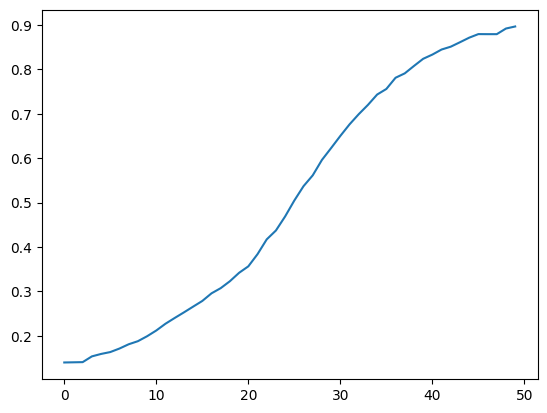

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [22]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
#     print(seed)
    if(i==no_words-1):
        return seed
    



In [23]:
seed_text = 'shrub'
next_words = 8
sentence = predict_words(seed_text, next_words)
words = sentence.split()
reversed_sentence = " ".join(words[::-1])
print(reversed_sentence)


1/1 [==============================] - 0s 27ms/step
fiona the football fanatic followed the earths exquisite shrub


In [24]:
model.save('allitration_generator.h5') # Will create a HDF5 file of the model

In [27]:
with open('al_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:

import pickle